In [139]:
import matplotlib.pyplot as plt
from Bio import Entrez # Accés à la base PubMed
import pandas as pd # Manipulation des données
import time
from matplotlib.axis import Axis

In [140]:
keywords = ['COVID-19', 'COVID-19 SARS-CoV-2', 'COVID-19 SARS-CoV-2 virus', 'COVID-19 SARS-CoV-2 virus also', 'COVID-19 SARS-CoV-2 virus also 2020', 'COVID-19 SARS-CoV-2 virus also 2020 cases', 'COVID-19 SARS-CoV-2 virus also 2020 cases people', 'COVID-19 SARS-CoV-2 virus also 2020 cases people March', 'COVID-19 SARS-CoV-2 virus also 2020 cases people March disease', 'COVID-19 SARS-CoV-2 virus also 2020 cases people March disease patients', 'COVID-19 SARS-CoV-2 virus also 2020 cases people March disease patients China', 'COVID-19 SARS-CoV-2 virus also 2020 cases people March disease patients China may', 'COVID-19 SARS-CoV-2 virus also 2020 cases people March disease patients China may hand', 'COVID-19 SARS-CoV-2 virus also 2020 cases people March disease patients China may hand symptoms', 'COVID-19 SARS-CoV-2 virus also 2020 cases people March disease patients China may hand symptoms outbreak']
#keywords = ['silage', 'silage alfalfa', 'silage alfalfa Virginia', 'silage alfalfa Virginia fanpetals', 'silage alfalfa Virginia fanpetals higher', 'silage alfalfa Virginia fanpetals higher DM', 'silage alfalfa Virginia fanpetals higher DM CP', 'silage alfalfa Virginia fanpetals higher DM CP characterized', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding chemical', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding chemical composition', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding chemical composition similar', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding chemical composition similar desirable', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding chemical composition similar desirable fermentation', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding chemical composition similar desirable fermentation pattern', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding chemical composition similar desirable fermentation pattern willingly', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding chemical composition similar desirable fermentation pattern willingly consumed', 'silage alfalfa Virginia fanpetals higher DM CP characterized digestibility The voluntary intake 0707 organic matter OM 0724 0861 NDF 0609 In comparison apparent nutrients significant difference noted significantly 14274 vs 954g greatest differences observed 0-2 8-12h feeding chemical composition similar desirable fermentation pattern willingly consumed rams']

In [141]:
#Plot corpus size evolution peer number on keywords
data = {"entryWordSize":[],"givenPuliedArticleSize":[],"givenCorpusSize":[]};

In [142]:
#Recherche des documents suivant une liste de mots clés A & D
def search(query, n_articles):
	#print("-----------liste de mots ----------", query)
	results = []
	Entrez.email = 'biljolefa@gmail.com'
	for q in query:
		data["entryWordSize"].append(len(q.split()))
        
	for q in query:
		handle = Entrez.esearch(db='pubmed', sort='relevance', retmax=str(n_articles), retmode='xml', term=q)
		results.append(Entrez.read(handle))
		time.sleep(1)
	return results

In [143]:
# Charger le résultat de la recherche, les articles trouvés suivant le mot clé
def fetch_details(id_list):
    ids = ','.join(id_list)
    Entrez.email = 'biljolefa@gmail.com'
    handle = Entrez.efetch(db='pubmed',
                           retmode='xml',
                           id=ids)
    results = Entrez.read(handle)
    return results

In [144]:
# Recherche et chargement des articles trouvés sur pubmed
def load_articles(keyword='fever', n_articles = 100):
	results = search(keyword, n_articles) # fever
	print("taille result", len(results))
	#id_list = results['IdList']
	#results = search(keyword, n_articles) # fever
	id_list = []
	for i in range(0, len(results)):
		count_words = 0
		#print("-------------------------------------re--------------------------------", re)
		id_list = results[i]['IdList']
		data["givenPuliedArticleSize"].append(len(','.join(id_list).split(",")))
		#print("----------------- id list --------------------", id_list)
		papers = fetch_details(id_list)
		#print("paper size", len(papers))
		try:
			for article in papers['PubmedArticle']:
				val = ""
				#print("-----clefs--------", article['MedlineCitation']['Article'].keys())
				#articles[paper['MedlineCitation']['Article']['ArticleTitle']] = ','.join(paper['MedlineCitation']['Article']['Abstract']['AbstractText'])
				if 'Abstract' in article['MedlineCitation']['Article'].keys():
					val = ','.join(article['MedlineCitation']['Article']['Abstract']['AbstractText'])
					print("val", len(val.split(" ")))
					count_words = len(val.split(" ")) + count_words
		except:
			print("error")
		print("compte", count_words)
		data["givenCorpusSize"].append(count_words)
		print("--------fin article N°", i)
	#print(articles)
		print("--------- dict --------------", data)
        
	return data

In [145]:
load_articles(keywords, 1000000)

taille result 15
val 203
val 247
val 312
val 235
val 236
val 299
val 202
val 109
val 106
val 203
val 60
val 206
val 270
val 253
val 255
val 292
val 390
val 184
val 231
val 307
val 85
val 258
val 360
val 53
val 193
val 214
val 50
val 100
val 242
val 471
val 249
val 164
val 212
val 106
val 351
val 255
val 176
val 54
val 320
val 157
val 185
val 325
val 162
val 137
val 111
val 209
val 235
val 158
val 324
val 231
val 306
val 165
val 262
val 317
val 185
val 139
val 314
val 197
val 124
val 152
val 228
val 300
val 219
val 164
val 538
val 303
val 245
val 195
val 212
val 221
val 185
val 266
val 170
val 248
val 190
val 300
val 269
val 211
val 242
val 108
val 171
val 243
val 193
val 311
val 205
val 204
val 211
val 393
val 219
val 377
val 247
val 86
val 216
val 193
val 283
val 148
val 205
val 165
val 238
val 248
val 120
val 228
val 199
val 236
val 293
val 565
val 255
val 169
val 249
val 263
val 249
val 147
val 246
val 168
val 147
val 171
val 252
val 51
val 235
val 315
val 186
val 255
val 121
val 24

val 249
val 243
val 48
val 219
val 445
val 247
val 215
val 280
val 226
val 181
val 174
val 250
val 220
val 165
val 219
val 90
val 206
val 137
val 527
val 205
val 217
val 242
val 265
val 291
val 126
val 202
val 250
val 224
val 333
val 263
val 150
val 265
val 231
val 231
val 170
val 219
val 118
val 249
val 241
val 221
val 275
val 262
val 170
val 184
val 239
val 204
val 201
val 161
val 190
val 240
val 189
val 197
val 216
val 272
val 113
val 112
val 148
val 143
val 366
val 191
val 242
val 258
val 276
val 290
val 345
val 273
val 106
val 261
val 357
val 206
val 249
val 213
val 267
val 154
val 158
val 845
val 190
val 105
val 198
val 125
val 172
val 303
val 197
val 249
val 257
val 156
val 282
val 225
val 276
val 382
val 202
val 237
val 203
val 234
val 215
val 210
val 186
val 322
val 195
val 169
val 234
val 240
val 234
val 150
val 205
val 212
val 173
val 185
val 303
val 233
val 136
val 237
val 172
val 141
val 105
val 140
val 193
val 269
val 150
val 297
val 159
val 254
val 216
val 206
val 49
val

val 198
val 215
val 241
val 142
val 480
val 74
val 198
val 222
val 147
val 177
val 71
val 204
val 84
val 52
val 187
val 194
val 171
val 374
val 266
val 227
val 209
val 198
val 104
val 50
val 250
val 242
val 205
val 251
val 49
val 295
val 115
val 151
val 366
val 272
val 117
val 203
val 248
val 120
val 104
val 236
val 265
val 73
val 232
val 197
val 258
val 133
val 213
val 200
val 159
val 403
val 337
val 239
val 237
val 196
val 221
val 25
val 329
val 209
val 238
val 143
val 221
val 235
val 190
val 295
val 339
val 356
val 256
val 256
val 158
val 226
val 200
val 127
val 258
val 257
val 243
val 248
val 294
val 370
val 155
val 190
val 193
val 176
val 201
val 218
val 98
val 204
val 150
val 171
val 149
val 25
val 316
val 231
val 215
val 201
val 110
val 254
val 228
val 181
val 238
val 198
val 158
val 283
val 159
val 121
val 218
val 240
val 189
val 156
val 150
val 223
val 245
val 421
val 264
val 220
val 236
val 159
val 253
val 256
val 265
val 195
val 163
val 146
val 156
val 280
val 259
val 99
val

val 231
val 139
val 236
val 270
val 96
val 47
val 153
val 324
val 173
val 150
val 115
val 53
val 131
val 198
val 135
val 201
val 46
val 268
val 173
val 115
val 188
val 203
val 200
val 149
val 134
val 267
val 122
val 335
val 149
val 180
val 198
val 144
val 154
val 675
val 215
val 255
val 209
val 145
val 278
val 132
val 163
val 73
val 614
val 265
val 253
val 190
val 369
val 234
val 142
val 168
val 118
val 236
val 156
val 161
val 179
val 184
val 203
val 171
val 200
val 187
val 197
val 199
val 263
val 150
val 244
val 250
val 273
val 190
val 207
val 194
val 74
val 233
val 350
val 251
val 159
val 193
val 179
val 241
val 118
val 225
val 146
val 231
val 251
val 257
val 182
val 292
val 182
val 296
val 196
val 104
val 148
val 339
val 294
val 190
val 169
val 257
val 267
val 239
val 75
val 46
val 252
val 251
val 205
val 144
val 236
val 51
val 267
val 302
val 224
val 179
val 216
val 246
val 209
val 116
val 196
val 144
val 253
val 136
val 261
val 138
val 250
val 133
val 180
val 175
val 300
val 202
v

val 240
val 190
val 197
val 203
val 260
val 267
val 252
val 127
val 102
val 76
val 270
val 291
val 262
val 92
val 254
val 358
val 259
val 271
val 244
val 173
val 226
val 227
val 259
val 173
val 231
val 228
val 68
val 110
val 291
val 129
val 245
val 208
val 300
val 282
val 253
val 104
val 149
val 254
val 199
val 209
val 198
val 196
val 59
val 152
val 179
val 238
val 291
val 248
val 160
val 209
val 350
val 259
val 139
val 242
val 246
val 138
val 269
val 285
val 216
val 147
val 236
val 133
val 212
val 201
val 130
val 258
val 243
val 146
val 69
val 256
val 193
val 150
val 201
val 242
val 295
val 143
val 225
val 406
val 109
val 186
val 237
val 70
val 382
val 236
val 291
val 235
val 257
val 280
val 154
val 149
val 131
val 114
val 247
val 204
val 151
val 205
val 143
val 231
val 46
val 150
val 241
val 157
val 246
val 201
val 168
val 143
val 298
val 77
val 178
val 116
val 216
val 166
val 195
val 210
val 272
val 460
val 233
val 134
val 144
val 243
val 268
val 198
val 211
val 200
val 156
val 250


val 90
val 50
val 290
val 367
val 228
val 166
val 53
val 53
val 149
val 181
val 241
val 209
val 267
val 385
val 265
val 149
val 205
val 50
val 274
val 394
val 150
val 150
val 158
val 854
val 148
val 134
val 135
val 142
val 201
val 135
val 300
val 247
val 189
val 229
val 199
val 220
val 193
val 242
val 206
val 153
val 291
val 292
val 174
val 236
val 4
val 195
val 137
val 174
val 173
val 265
val 232
val 223
val 322
val 51
val 215
val 161
val 246
val 128
val 200
val 283
val 249
val 392
val 172
val 223
val 220
val 188
val 160
val 258
val 193
val 203
val 89
val 122
val 218
val 242
val 258
val 149
val 277
val 50
val 48
val 217
val 230
val 146
val 75
val 338
val 211
val 254
val 245
val 105
val 257
val 130
val 240
val 191
val 192
val 202
val 98
val 294
val 251
val 218
val 93
val 384
val 283
val 203
val 304
val 396
val 259
val 199
val 221
val 80
val 201
val 166
val 181
val 160
val 279
val 238
val 331
val 246
val 333
val 199
val 196
val 151
val 188
val 235
val 259
val 188
val 325
val 119
val 100

val 161
val 143
val 139
val 235
val 190
val 339
val 335
val 385
val 224
val 189
val 178
val 388
val 276
val 245
val 401
val 640
val 188
val 152
val 155
val 234
val 141
val 151
val 158
val 270
val 240
val 249
val 143
val 205
val 251
val 131
val 207
val 278
val 285
val 236
val 190
val 237
val 227
val 145
val 188
val 155
val 209
val 158
val 261
val 105
val 164
val 201
val 223
val 155
val 189
val 241
val 168
val 244
val 224
val 297
val 192
val 105
val 258
val 176
val 247
val 185
val 220
val 150
val 189
val 50
val 216
val 242
val 256
val 144
val 194
val 244
val 98
val 156
val 845
val 192
val 206
val 189
val 142
val 150
val 293
val 293
val 137
val 247
val 180
val 130
val 163
val 257
val 244
val 187
val 394
val 50
val 187
val 141
val 152
val 296
val 213
val 240
val 247
val 238
val 258
val 245
val 269
val 251
val 215
val 295
val 246
val 112
val 203
val 254
val 150
val 203
val 182
val 199
val 235
val 246
val 659
val 143
val 149
val 244
val 159
val 237
val 284
val 257
val 211
val 284
val 199
val

val 239
val 294
val 188
val 157
val 219
val 275
val 77
val 156
val 195
val 345
val 266
val 116
val 259
val 232
val 112
val 216
val 242
val 136
val 306
val 249
val 157
val 145
val 240
val 315
val 291
val 231
val 356
val 214
val 220
val 186
val 149
val 234
val 433
val 221
val 265
val 171
val 220
val 102
val 244
val 139
val 226
val 196
val 150
val 251
val 136
val 238
val 199
val 166
val 146
val 376
val 109
val 168
val 242
val 186
val 124
val 245
val 229
val 197
val 135
val 145
val 312
val 254
val 187
val 376
val 305
val 246
val 157
val 146
val 137
val 49
val 149
val 114
val 244
val 219
val 221
val 124
val 162
val 186
val 229
val 298
val 277
val 60
val 322
val 194
val 150
val 232
val 149
val 294
val 151
val 169
val 150
val 237
val 1371
val 182
val 402
val 364
val 185
val 179
val 263
val 238
val 281
val 169
val 177
val 147
val 150
val 243
val 235
val 238
val 256
val 167
val 196
val 276
val 192
val 207
val 230
val 129
val 224
val 198
val 265
val 239
val 208
val 150
val 235
val 197
val 188
va

val 109
val 17
val 215
val 200
val 150
val 332
val 142
val 209
val 59
val 70
val 255
val 265
val 243
val 110
val 334
val 358
val 271
val 120
val 190
val 465
val 264
val 200
val 143
val 117
val 218
val 175
val 227
val 251
val 263
val 130
val 344
val 202
val 152
val 498
val 166
val 247
val 266
val 141
val 202
val 184
val 138
val 177
val 235
val 523
val 168
val 100
val 314
val 215
val 130
val 382
val 198
val 152
val 182
val 252
val 136
val 262
val 253
val 124
val 54
val 242
val 257
val 146
val 210
val 140
val 187
val 93
val 169
val 302
val 249
val 318
val 186
val 220
val 370
val 142
val 502
val 136
val 149
val 136
val 153
val 247
val 353
val 204
val 241
val 336
val 139
val 172
val 241
val 298
val 48
val 200
val 218
val 285
val 178
val 50
val 287
val 150
val 100
val 166
val 161
val 245
val 214
val 150
val 202
val 191
val 240
val 251
val 196
val 217
val 221
val 428
val 119
val 161
val 218
val 73
val 218
val 233
val 253
val 292
val 814
val 300
val 250
val 374
val 208
val 282
val 166
val 490


val 182
val 443
val 165
val 256
val 220
val 242
val 226
val 177
val 146
val 203
val 74
val 212
val 215
val 148
val 218
val 275
val 146
val 285
val 114
val 86
val 100
val 189
val 211
val 238
val 186
val 233
val 150
val 156
val 159
val 251
val 100
val 144
val 185
val 169
val 166
val 227
val 359
val 245
val 298
val 160
val 187
val 78
val 247
val 230
val 233
val 438
val 376
val 202
val 253
val 24
val 238
val 257
val 122
val 228
val 151
val 192
val 175
val 143
val 202
val 195
val 99
val 151
val 119
val 184
val 190
val 180
val 257
val 161
val 223
val 221
val 202
val 148
val 79
val 306
val 401
val 166
val 283
val 222
val 257
val 150
val 63
val 226
val 164
val 202
val 159
val 212
val 194
val 165
val 170
val 233
val 346
val 153
val 168
val 191
val 254
val 244
val 95
val 221
val 165
val 239
val 185
val 213
val 206
val 166
val 52
val 220
val 304
val 291
val 227
val 188
val 106
val 161
val 304
val 306
val 139
val 151
val 98
val 161
val 273
val 196
val 230
val 150
val 283
val 208
val 246
val 259
va

val 228
val 249
val 220
val 175
val 191
val 147
val 139
val 180
val 205
val 145
val 135
val 176
val 182
val 241
val 190
val 236
val 94
val 223
val 157
val 218
val 258
val 51
val 171
val 204
val 49
val 196
val 301
val 254
val 150
val 418
val 253
val 207
val 187
val 137
val 98
val 178
val 225
val 551
val 142
val 242
val 122
val 210
val 240
val 235
val 248
val 174
val 232
val 190
val 154
val 311
val 303
val 208
val 132
val 242
val 120
val 208
val 150
val 332
val 226
val 258
val 250
val 166
val 144
val 167
val 143
val 130
val 199
val 140
val 130
val 262
val 93
val 253
val 284
val 153
val 150
val 236
val 195
val 201
val 240
val 324
val 147
val 235
val 125
val 152
val 207
val 117
val 267
val 255
val 200
val 252
val 202
val 260
val 378
val 162
val 227
val 192
val 149
val 100
val 154
val 139
val 162
val 160
val 201
val 245
val 234
val 147
val 51
val 235
val 100
val 194
val 175
val 50
val 52
val 115
val 178
val 189
val 176
val 170
val 229
val 353
val 50
val 239
val 138
val 199
val 71
val 263
va

val 331
val 174
val 154
val 186
val 210
val 119
val 311
val 413
val 188
val 168
val 316
val 1020
val 135
val 272
val 244
val 154
val 214
val 154
val 190
val 211
val 160
val 284
val 97
val 151
val 48
val 294
val 191
val 249
val 151
val 265
val 171
val 204
val 141
val 74
val 222
val 102
val 153
val 224
val 240
val 275
val 138
val 194
val 222
val 171
val 214
val 120
val 47
val 225
val 319
val 224
val 204
val 266
val 108
val 139
val 141
val 226
val 389
val 261
val 268
val 260
val 131
val 179
val 246
val 224
val 272
val 274
val 143
val 128
val 202
val 219
val 273
val 240
val 203
val 155
val 216
val 126
val 208
val 198
val 252
val 145
val 254
val 185
val 402
val 167
val 138
val 183
val 285
val 53
val 199
val 209
val 116
val 192
val 139
val 171
val 243
val 193
val 49
val 122
val 298
val 142
val 191
val 316
val 173
val 241
val 242
val 224
val 213
val 37
val 237
val 168
val 235
val 189
val 149
val 205
val 136
val 223
val 210
val 80
val 71
val 121
val 150
val 160
val 266
val 350
val 258
val 201


val 248
val 287
val 215
val 89
val 342
val 103
val 176
val 210
val 236
val 250
val 217
val 225
val 169
val 215
val 155
val 315
val 263
val 290
val 124
val 201
val 206
val 275
val 34
val 265
val 155
val 234
val 209
val 112
val 212
val 181
val 445
val 240
val 235
val 457
val 216
val 225
val 51
val 152
val 176
val 163
val 246
val 50
val 195
val 189
val 428
val 255
val 273
val 189
val 233
val 220
val 339
val 145
val 140
val 154
val 203
val 237
val 199
val 213
val 164
val 209
val 53
val 186
val 193
val 332
val 197
val 249
val 211
val 54
val 204
val 216
val 180
val 201
val 365
val 255
val 224
val 208
val 150
val 208
val 161
val 251
val 136
val 416
val 220
val 237
val 281
val 241
val 97
val 185
val 238
val 157
val 198
val 254
val 449
val 187
val 190
val 202
val 174
val 156
val 282
val 63
val 173
val 274
val 228
val 240
val 38
val 250
val 230
val 240
val 245
val 233
val 1227
val 144
val 200
val 335
val 158
val 248
val 143
val 60
val 312
val 213
val 276
val 143
val 345
val 319
val 168
val 215
v

val 199
val 242
val 156
val 218
val 84
val 346
val 229
val 179
val 191
val 215
val 206
val 225
val 215
val 437
val 195
val 238
val 229
val 245
val 293
val 219
val 233
val 110
val 168
val 232
val 164
val 142
val 142
val 263
val 195
val 167
val 184
val 142
val 242
val 480
val 146
val 277
val 283
val 191
val 336
val 240
val 247
val 212
val 189
val 234
val 213
val 258
val 148
val 154
val 440
val 272
val 192
val 235
val 228
val 236
val 233
val 232
val 195
val 210
val 295
val 104
val 229
val 147
val 186
val 279
val 197
val 205
val 216
val 246
val 49
val 44
val 223
val 194
val 153
val 157
val 149
val 308
val 260
val 398
val 247
val 138
val 247
val 101
val 53
val 246
val 143
val 143
val 240
val 413
val 198
val 269
val 189
val 256
val 192
val 218
val 261
val 259
val 234
val 95
val 245
val 201
val 305
val 147
val 307
val 300
val 594
val 190
val 113
val 144
val 190
val 247
val 153
val 183
val 218
val 260
val 192
val 50
val 240
val 184
val 161
val 238
val 95
val 228
val 148
val 182
val 240
val 100

val 285
val 312
val 154
val 152
val 113
val 150
val 182
val 362
val 150
val 125
val 200
val 45
val 231
val 203
val 182
val 130
val 274
val 347
val 201
val 80
val 48
val 217
val 305
val 195
val 224
val 176
val 245
val 234
val 168
val 137
val 182
val 302
val 199
val 212
val 289
val 244
val 188
val 198
val 303
val 245
val 261
val 230
val 280
val 147
val 73
val 401
val 371
val 234
val 245
val 284
val 129
val 162
val 144
val 169
val 245
val 204
val 199
val 196
val 183
val 291
val 242
val 221
val 244
val 230
val 145
val 227
val 252
val 155
val 143
val 189
val 281
val 226
val 213
val 225
val 179
val 364
val 58
val 239
val 220
val 332
val 300
val 369
val 196
val 173
val 347
val 274
val 186
val 270
val 187
val 189
val 119
val 59
val 132
val 234
val 149
val 51
val 282
val 376
val 97
val 212
val 378
val 203
val 344
val 170
val 168
val 172
val 209
val 152
val 339
val 694
val 151
val 335
val 192
val 147
val 196
val 179
val 233
val 230
val 173
val 225
val 188
val 271
val 191
val 148
val 180
val 195


val 67
val 220
val 178
val 196
val 207
val 272
val 267
val 25
val 103
val 177
val 188
val 144
val 66
val 254
val 397
val 117
val 172
val 258
val 235
val 188
val 243
val 191
val 310
val 151
val 270
val 150
val 429
val 187
val 282
val 234
val 347
val 212
val 349
val 184
val 407
val 127
val 266
val 243
val 203
val 304
val 99
val 241
val 83
val 100
val 110
val 249
val 246
val 199
val 87
val 134
val 186
val 205
val 181
val 170
val 123
val 243
val 257
val 146
val 103
val 154
val 72
val 150
val 325
val 249
val 245
val 324
val 109
val 207
val 197
val 483
val 136
val 227
val 234
val 237
val 197
val 319
val 189
val 214
val 527
val 167
val 246
val 210
val 156
val 139
val 152
val 127
val 242
val 77
val 176
val 152
val 244
val 150
val 176
val 231
val 255
val 247
val 286
val 189
val 132
val 212
val 81
val 370
val 173
val 207
val 353
val 252
val 288
val 100
val 315
val 222
val 303
val 191
val 194
val 199
val 270
val 186
val 247
val 249
val 226
val 237
val 305
val 212
val 221
val 105
val 188
val 177
v

val 133
val 165
val 243
val 235
val 220
val 231
val 171
val 89
val 261
val 126
val 173
val 199
val 145
val 195
val 148
val 177
val 238
val 381
val 123
val 244
val 235
val 244
val 261
val 126
val 115
val 182
val 237
val 242
val 197
val 266
val 174
val 177
val 245
val 122
val 263
val 358
val 249
val 97
val 260
val 189
val 189
val 298
val 241
val 194
val 333
val 115
val 228
val 141
val 160
val 333
val 188
val 213
val 264
val 166
val 198
val 122
val 194
val 253
val 224
val 403
val 143
val 83
val 251
val 143
val 133
val 317
val 49
val 155
val 186
val 244
val 140
val 161
val 245
val 293
val 148
val 50
val 226
val 254
val 198
val 249
val 160
val 51
val 127
val 154
val 258
val 312
val 218
val 90
val 229
val 114
val 178
val 124
val 211
val 194
val 201
val 263
val 242
val 223
val 248
val 147
val 209
val 214
val 165
val 178
val 189
val 163
val 197
val 269
val 180
val 243
val 169
val 126
val 153
val 270
val 144
val 227
val 191
val 284
val 246
val 1216
val 237
val 166
val 178
val 163
val 275
val 21

val 287
val 242
val 249
val 216
val 190
val 197
val 250
val 185
val 235
val 140
val 223
val 268
val 113
val 258
val 227
val 277
val 163
val 232
val 190
val 123
val 196
val 232
val 144
val 180
val 183
val 194
val 242
val 227
val 770
val 195
val 140
val 126
val 204
val 198
val 196
val 93
val 139
val 54
val 49
val 157
val 113
val 211
val 200
val 262
val 237
val 49
val 100
val 365
val 273
val 380
val 247
val 676
val 187
val 285
val 142
val 249
val 169
val 184
val 149
val 429
val 417
val 164
val 171
val 235
val 137
compte 1941653
--------fin article N° 2
--------- dict -------------- {'entryWordSize': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'givenPuliedArticleSize': [248820, 157266, 157266], 'givenCorpusSize': [1899439, 1953683, 1941653]}
val 203
val 247
val 235
val 312
val 236
val 299
val 202
val 109
val 214
val 203
val 60
val 270
val 253
val 184
val 255
val 292
val 390
val 231
val 427
val 360
val 258
val 375
val 53
val 240
val 193
val 193
val 50
val 242
val 100
val 471
val 21

val 254
val 449
val 187
val 190
val 202
val 174
val 156
val 282
val 63
val 173
val 274
val 228
val 240
val 38
val 250
val 230
val 240
val 245
val 233
val 1227
val 144
val 200
val 335
val 158
val 248
val 143
val 60
val 312
val 213
val 276
val 143
val 345
val 319
val 168
val 215
val 232
val 215
val 237
val 102
val 247
val 240
val 201
val 91
val 261
val 191
val 257
val 213
val 254
val 288
val 150
val 156
val 212
val 189
val 274
val 148
val 201
val 206
val 251
val 192
val 273
val 149
val 242
val 141
val 105
val 89
val 211
val 434
val 159
val 398
val 206
val 297
val 251
val 155
val 230
val 845
val 190
val 188
val 207
val 250
val 188
val 189
val 152
val 189
val 233
val 299
val 321
val 182
val 112
val 151
val 141
val 125
val 283
val 241
val 227
val 192
val 244
val 227
val 248
val 177
val 113
val 130
val 249
val 203
val 279
val 239
val 130
val 240
val 207
val 81
val 105
val 152
val 219
val 372
val 157
val 231
val 201
val 242
val 257
val 247
val 239
val 226
val 260
val 113
val 224
val 144
val 2

val 272
val 192
val 235
val 228
val 236
val 233
val 232
val 195
val 210
val 295
val 104
val 229
val 147
val 186
val 279
val 197
val 205
val 216
val 246
val 49
val 44
val 223
val 194
val 153
val 157
val 149
val 308
val 260
val 398
val 247
val 138
val 247
val 101
val 53
val 246
val 143
val 143
val 240
val 413
val 198
val 269
val 189
val 256
val 192
val 218
val 261
val 259
val 234
val 95
val 245
val 201
val 305
val 147
val 307
val 300
val 594
val 190
val 113
val 144
val 190
val 247
val 153
val 183
val 218
val 260
val 192
val 50
val 240
val 184
val 161
val 238
val 95
val 228
val 148
val 182
val 240
val 100
val 288
val 166
val 256
val 188
val 208
val 266
val 249
val 158
val 310
val 141
val 265
val 151
val 171
val 254
val 122
val 223
val 289
val 187
val 159
val 304
val 107
val 215
val 305
val 157
val 281
val 116
val 356
val 150
val 178
val 224
val 236
val 217
val 147
val 235
val 238
val 391
val 97
val 262
val 134
val 230
val 284
val 237
val 53
val 111
val 306
val 143
val 100
val 184
val 212


val 39
val 109
val 232
val 247
val 243
val 383
val 126
val 204
val 126
val 108
val 223
val 182
val 181
val 202
val 241
val 170
val 148
val 247
val 421
val 201
val 179
val 214
val 162
val 144
val 264
val 194
val 199
val 261
val 175
val 187
val 227
val 203
val 75
val 233
val 193
val 156
val 215
val 255
val 285
val 193
val 190
val 238
val 200
val 204
val 157
val 56
val 79
val 249
val 299
val 190
val 173
val 51
val 152
val 132
val 270
val 498
val 186
val 132
val 235
val 249
val 46
val 49
val 195
val 187
val 264
val 141
val 215
val 348
val 180
val 226
val 741
val 214
val 209
val 220
val 126
val 188
val 297
val 311
val 354
val 199
val 114
val 304
val 302
val 247
val 235
val 216
val 328
val 252
val 189
val 181
val 294
val 296
val 355
val 251
val 197
val 253
val 171
val 202
val 198
val 186
val 260
val 162
val 244
val 147
val 137
val 69
val 318
val 263
val 248
val 219
val 150
val 377
val 271
val 100
val 321
val 277
val 252
val 253
val 244
val 248
val 451
val 166
val 253
val 411
val 278
val 279


val 230
val 153
val 293
val 147
val 336
val 225
val 236
val 151
val 135
val 200
val 125
val 221
val 255
val 207
val 323
val 222
val 218
val 195
val 197
val 165
val 296
val 78
val 263
val 215
val 245
val 257
val 146
val 195
val 100
val 202
val 263
val 171
val 265
val 200
val 175
val 278
val 242
val 209
val 204
val 154
val 229
val 200
val 145
val 293
val 197
val 172
val 148
val 228
val 256
val 193
val 196
val 262
val 142
val 206
val 219
val 54
val 234
val 244
val 221
val 144
val 243
val 137
val 244
val 245
val 159
val 53
val 185
val 135
val 181
val 94
val 226
val 173
val 271
val 209
val 200
val 196
val 271
val 110
val 163
val 192
val 159
val 162
val 246
val 179
val 315
val 222
val 554
val 346
val 246
val 130
val 126
val 189
val 244
val 178
val 348
val 233
val 188
val 90
val 198
val 157
val 225
val 282
val 174
val 243
val 214
val 106
val 118
val 49
val 55
val 195
val 118
val 152
val 236
val 206
val 219
val 329
val 230
val 288
val 157
val 216
val 214
val 46
val 150
val 148
val 209
val 210


val 122
val 194
val 253
val 224
val 403
val 143
val 83
val 251
val 143
val 133
val 317
val 49
val 155
val 186
val 244
val 140
val 161
val 245
val 293
val 148
val 50
val 226
val 254
val 198
val 249
val 160
val 51
val 127
val 154
val 258
val 312
val 218
val 90
val 229
val 114
val 178
val 124
val 211
val 194
val 201
val 263
val 242
val 223
val 248
val 147
val 209
val 214
val 165
val 178
val 189
val 163
val 197
val 269
val 180
val 243
val 169
val 126
val 153
val 270
val 144
val 227
val 191
val 284
val 246
val 1216
val 237
val 166
val 178
val 163
val 275
val 210
val 480
val 149
val 106
val 51
val 239
val 231
val 153
val 204
val 267
val 142
val 352
val 201
val 160
val 166
val 109
val 392
val 210
val 145
val 461
val 148
val 237
val 280
val 182
val 140
val 200
val 117
val 200
val 50
val 230
val 245
val 292
val 212
val 280
val 283
val 151
val 202
val 260
val 270
val 243
val 142
val 199
val 217
val 208
val 197
val 157
val 257
val 286
val 247
val 168
val 144
val 319
val 94
val 97
val 221
val 209


val 190
val 123
val 196
val 232
val 144
val 180
val 183
val 194
val 242
val 227
val 770
val 195
val 140
val 126
val 204
val 198
val 196
val 93
val 139
val 54
val 49
val 157
val 113
val 211
val 200
val 262
val 237
val 49
val 100
val 365
val 273
val 380
val 247
val 676
val 187
val 285
val 142
val 249
val 169
val 184
val 149
val 429
val 417
val 164
val 171
val 235
val 137
compte 1941653
--------fin article N° 3
--------- dict -------------- {'entryWordSize': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'givenPuliedArticleSize': [248820, 157266, 157266, 157266], 'givenCorpusSize': [1899439, 1953683, 1941653, 1941653]}
val 247
val 236
val 312
val 202
val 109
val 255
val 270
val 292
val 390
val 427
val 360
val 193
val 249
val 193
val 100
val 191
val 242
val 471
val 106
val 231
val 307
val 129
val 235
val 137
val 255
val 85
val 162
val 245
val 325
val 303
val 253
val 306
val 152
val 248
val 300
val 236
val 195
val 170
val 211
val 212
val 148
val 293
val 165
val 238
val 191
val 242
val

val 160
val 294
val 293
val 229
val 263
val 152
val 233
val 131
val 170
val 52
val 229
val 228
val 130
val 237
val 327
val 132
val 280
val 209
val 199
val 148
val 169
val 210
val 49
val 421
val 195
val 225
val 199
val 168
val 145
val 228
val 131
val 202
val 223
val 134
val 398
val 332
val 173
val 305
val 124
val 160
val 209
val 189
val 12
val 213
val 227
val 183
val 132
val 210
val 505
val 107
val 236
val 142
val 190
val 148
val 304
val 240
val 182
val 185
val 245
val 166
val 200
val 145
val 283
val 170
val 79
val 267
val 313
val 137
val 141
val 163
val 289
val 253
val 237
val 129
val 312
val 310
val 185
val 116
val 147
val 224
val 268
val 376
val 284
val 154
val 139
val 235
val 195
val 230
val 109
val 231
val 284
val 220
val 240
val 104
val 230
val 149
val 223
val 289
val 142
val 224
val 276
val 255
val 234
val 144
val 151
val 247
val 318
val 156
val 145
val 171
val 225
val 96
val 200
val 239
val 245
val 232
val 147
val 142
val 56
val 137
val 203
val 81
val 172
val 347
val 237
val 226

val 378
val 199
val 242
val 249
val 315
val 266
val 235
val 370
val 142
val 274
val 76
val 216
val 129
val 114
val 105
val 226
val 240
val 600
val 161
val 230
val 197
val 322
val 208
val 217
val 186
val 195
val 201
val 263
val 198
val 334
val 214
val 240
val 237
val 176
val 144
val 192
val 164
val 160
val 153
val 255
val 144
val 149
val 221
val 266
val 156
val 107
val 182
val 370
val 208
val 294
val 337
val 331
val 283
val 209
val 165
val 236
val 145
val 388
val 161
val 196
val 110
val 246
val 226
val 234
val 231
val 373
val 563
val 192
val 210
val 184
val 141
val 199
val 101
val 141
val 231
val 198
val 242
val 80
val 348
val 327
val 46
val 204
val 233
val 286
val 113
val 259
val 220
val 246
val 130
val 150
val 234
val 350
val 121
val 262
val 349
val 249
val 169
val 387
val 215
val 242
val 226
val 108
val 115
val 264
val 374
val 215
val 197
val 228
val 218
val 81
val 156
val 527
val 237
val 331
val 182
val 266
val 246
val 188
val 125
val 49
val 126
val 115
val 228
val 160
val 248
val 2

val 176
val 91
val 297
val 254
val 112
val 184
val 337
val 210
val 153
val 309
val 147
val 247
val 288
val 227
val 193
val 235
val 298
val 376
val 240
val 187
val 97
val 192
val 199
val 179
val 94
val 235
val 215
val 283
val 245
val 259
val 259
val 151
val 321
val 193
val 97
val 53
val 45
val 215
val 387
val 200
val 222
val 254
val 205
val 175
val 285
val 244
val 154
val 194
val 107
val 353
val 266
val 211
val 108
val 229
val 225
val 209
val 184
val 151
val 135
val 170
val 465
val 243
val 253
val 50
val 54
val 230
val 418
val 247
val 152
val 139
val 248
val 686
val 303
val 148
val 244
val 202
val 240
val 235
val 25
val 194
val 245
val 110
val 215
val 181
val 276
val 277
val 241
val 185
val 234
val 136
val 270
val 116
val 250
val 140
val 261
val 198
val 123
val 206
val 144
val 160
val 229
val 247
val 371
val 422
val 235
val 150
val 179
val 187
val 163
val 244
val 274
val 173
val 86
val 248
val 139
val 306
val 148
val 73
val 55
val 170
val 137
val 250
val 127
val 190
val 239
val 190
val 

val 149
val 289
val 180
val 135
val 194
val 272
val 300
val 249
val 244
val 438
val 123
val 182
val 237
val 255
val 247
val 165
val 307
val 229
val 405
val 206
val 273
val 101
val 221
val 220
val 117
val 348
val 187
val 99
val 175
val 148
val 8
val 232
val 227
val 207
val 428
val 222
val 122
val 222
val 169
val 295
val 47
val 333
val 201
val 236
val 276
val 252
val 108
val 214
val 122
val 284
val 190
val 346
val 299
val 242
val 361
val 157
val 148
val 158
val 294
val 69
val 200
val 156
val 217
val 106
val 176
val 391
val 146
val 92
val 252
val 299
val 112
val 303
val 222
val 255
val 126
val 235
val 136
val 193
val 178
val 247
val 171
val 193
val 259
val 247
val 186
val 304
val 187
val 139
val 181
val 407
val 204
val 238
val 197
val 230
val 33
val 146
val 199
val 218
val 251
val 160
val 206
val 59
val 201
val 224
val 284
val 227
val 487
val 183
val 229
val 289
val 185
val 232
val 196
val 161
val 72
val 138
val 278
val 141
val 99
val 162
val 237
val 295
val 197
val 202
val 70
val 250
val

val 249
val 291
val 178
val 244
val 212
val 258
val 101
val 238
val 170
val 115
val 340
val 381
val 187
val 332
val 148
val 106
val 146
val 273
val 332
val 161
val 188
val 170
val 260
val 139
val 330
val 167
val 300
val 49
val 53
val 149
val 273
val 217
val 286
val 307
val 198
val 383
val 50
val 242
val 247
val 156
val 208
val 81
val 256
val 182
val 667
val 226
val 132
val 202
val 145
val 145
val 260
val 214
val 111
val 308
val 164
val 84
val 344
val 148
val 151
val 216
val 203
val 103
val 146
val 212
val 276
val 245
val 277
val 251
val 293
val 238
val 233
val 229
val 130
val 192
val 229
val 128
val 136
val 165
val 183
val 248
val 197
val 141
val 536
val 275
val 109
val 223
val 208
val 221
val 198
val 145
val 287
val 203
val 376
val 243
val 229
val 236
val 347
val 301
val 58
val 261
val 100
val 118
val 214
val 237
val 75
val 157
val 275
val 47
val 151
val 245
val 624
val 186
val 161
val 291
val 88
val 156
val 301
val 236
val 211
val 288
val 228
val 398
val 170
val 197
val 193
val 196
v

val 236
val 255
val 427
val 193
val 231
val 191
val 300
val 255
val 242
val 307
val 85
val 245
val 306
val 236
val 195
val 170
val 211
val 293
val 165
val 565
val 377
val 176
val 410
val 147
val 223
val 283
val 351
val 215
val 161
val 262
val 248
val 197
val 221
val 239
val 538
val 336
val 186
val 783
val 251
val 224
val 169
val 213
val 216
val 249
val 209
val 236
val 228
val 135
val 303
val 419
val 242
val 250
val 147
val 204
val 225
val 236
val 311
val 348
val 1174
val 332
val 226
val 237
val 470
val 241
val 249
val 230
val 210
val 242
val 62
val 273
val 293
val 423
val 233
val 244
val 182
val 263
val 401
val 251
val 163
val 345
val 206
val 223
val 244
val 180
val 204
val 248
val 209
val 239
val 250
val 242
val 249
val 320
val 207
val 265
val 249
val 292
val 269
val 147
val 134
val 149
val 210
val 262
val 272
val 168
val 201
val 147
val 240
val 287
val 274
val 241
val 248
val 313
val 210
val 312
val 246
val 89
val 210
val 327
val 204
val 285
val 219
val 221
val 227
val 213
val 280
va

val 214
val 285
val 363
val 203
val 75
val 212
val 653
val 152
val 199
val 252
val 342
val 189
val 258
val 242
val 173
val 227
val 283
val 278
val 258
val 244
val 165
val 252
val 89
val 323
val 191
val 249
val 126
val 292
val 79
val 487
val 292
val 258
val 256
val 285
val 244
val 279
val 289
val 252
val 210
val 208
val 336
val 238
val 192
val 391
val 235
val 237
val 249
val 271
val 302
val 274
val 285
val 198
val 198
val 139
val 252
val 105
val 52
val 195
val 238
val 274
val 221
val 487
val 356
val 237
val 220
val 226
val 276
val 313
val 257
val 180
val 163
val 246
val 279
val 132
val 365
val 218
val 208
val 217
val 250
val 217
val 206
val 358
val 114
val 201
val 141
val 213
val 181
val 202
val 351
val 197
val 60
val 240
val 525
val 188
val 225
val 175
val 160
val 184
val 135
val 129
val 276
val 198
val 214
val 244
val 152
val 302
val 203
val 191
val 258
val 325
val 279
val 156
val 227
val 249
val 206
val 287
val 239
val 128
val 248
val 248
val 236
val 68
val 455
val 219
val 72
val 211

val 292
val 203
val 609
val 480
val 343
val 115
val 239
val 116
val 223
val 183
val 282
val 226
val 274
val 253
val 298
val 310
val 270
val 214
val 96
val 256
val 101
val 206
val 136
val 113
val 138
val 248
val 278
val 253
val 232
val 208
val 262
val 274
val 171
val 225
val 274
val 178
val 1130
val 233
val 62
val 166
val 182
val 254
val 513
val 53
val 177
val 660
val 160
val 136
val 224
val 346
val 229
val 228
val 305
val 237
val 181
val 166
val 237
val 275
val 218
val 303
val 143
val 379
val 206
val 305
val 459
val 240
val 272
val 143
val 211
val 246
val 204
val 250
val 260
val 337
val 406
val 204
val 339
val 266
val 237
val 68
val 199
val 267
val 292
val 323
val 199
val 186
val 185
val 239
val 206
val 188
val 95
val 140
val 211
val 170
val 154
val 202
val 261
val 271
val 154
val 264
val 184
val 422
val 232
val 145
val 208
val 222
val 146
val 155
val 145
val 128
val 48
val 119
val 158
val 432
val 236
val 208
val 163
val 237
val 267
val 250
val 72
val 276
val 206
val 242
val 122
val 23

val 264
val 207
val 200
val 212
val 224
val 139
val 257
val 321
val 189
val 465
val 346
val 245
val 248
val 240
val 75
val 241
val 120
val 384
val 125
val 229
val 264
val 119
val 189
val 141
val 308
val 151
val 286
val 337
val 124
val 244
val 329
val 148
val 595
val 297
val 180
val 241
val 114
val 269
val 223
val 86
val 114
val 191
val 187
val 1643
val 241
val 229
val 196
val 97
val 274
val 255
val 146
val 335
val 506
val 76
val 371
val 149
val 249
val 196
val 417
val 190
val 227
val 301
val 125
val 904
val 129
val 300
val 260
val 196
val 188
val 432
val 254
val 346
val 262
val 76
val 187
val 217
val 348
val 93
val 246
val 123
val 288
val 152
val 195
val 247
val 284
val 239
val 229
val 404
val 247
val 296
val 106
val 321
val 219
val 280
val 242
val 185
val 286
val 290
val 248
val 226
val 353
val 236
val 160
val 237
val 301
val 139
val 338
val 252
val 219
val 213
val 110
val 463
val 195
val 246
val 245
val 242
val 261
val 227
val 224
val 189
val 168
val 608
val 227
val 227
val 149
val 1

val 270
val 239
val 261
val 190
val 112
val 270
val 226
val 201
val 236
val 93
val 241
val 240
val 321
val 240
val 249
val 252
val 403
val 199
val 167
val 247
val 218
val 310
val 442
val 211
val 180
val 232
val 242
val 191
val 189
val 137
val 244
val 230
val 213
val 199
val 30
val 175
val 252
val 341
val 238
val 403
val 132
val 256
val 226
val 302
val 235
val 340
val 244
val 284
val 282
val 289
val 277
val 300
val 258
val 262
val 167
val 222
val 201
val 101
val 151
val 161
val 157
val 279
val 403
val 101
val 234
val 281
val 341
val 94
val 310
val 193
val 253
val 189
val 68
val 199
val 143
val 244
val 227
val 249
val 211
val 75
val 238
val 322
val 280
val 212
val 239
val 207
val 332
val 94
val 115
val 254
val 258
val 140
val 282
val 295
val 141
val 204
val 172
val 196
val 126
val 265
val 245
val 249
val 155
val 208
val 130
val 239
val 170
val 211
val 117
val 84
val 239
val 229
val 178
val 154
val 171
val 277
val 135
val 303
val 287
val 217
val 256
val 304
val 322
val 188
val 189
val 228

val 279
val 221
val 184
val 244
val 164
val 228
val 225
val 72
val 149
val 43
val 222
val 242
val 302
val 335
val 209
val 280
val 253
val 188
val 205
val 231
val 428
val 243
val 217
val 259
val 224
val 245
val 222
val 151
val 219
val 166
val 109
val 349
val 136
val 299
val 234
val 1097
val 344
val 345
val 308
val 209
val 242
val 171
val 305
val 539
val 241
val 174
val 205
val 170
val 240
val 267
val 256
val 254
val 240
val 58
val 233
val 180
val 245
val 290
val 232
val 376
val 163
val 159
val 201
val 118
val 254
val 184
val 275
val 297
val 215
val 194
val 291
val 299
val 252
val 82
val 247
val 251
val 104
val 101
val 203
val 237
val 234
val 306
val 213
val 384
val 255
val 186
val 251
val 216
val 223
val 271
val 250
val 92
val 430
val 114
val 178
val 191
val 193
val 209
val 273
val 248
val 124
val 289
val 244
val 279
val 234
val 187
val 292
val 179
val 266
val 200
val 365
val 180
val 279
val 282
val 372
val 256
val 317
val 297
val 230
val 243
val 317
val 193
val 207
val 260
val 62
val 2

val 126
val 171
val 347
val 239
val 231
val 250
val 239
val 241
val 285
val 268
val 235
val 205
val 332
val 214
val 173
val 267
val 246
val 288
val 198
val 272
val 158
val 211
val 255
val 160
val 150
val 295
val 208
val 409
val 107
val 203
val 241
val 197
val 182
val 263
val 284
val 275
val 240
val 160
val 278
val 220
val 238
val 200
val 228
val 215
val 248
val 274
val 292
val 382
val 244
val 202
val 204
val 242
val 242
val 173
val 286
val 219
val 144
val 184
val 234
val 294
val 373
val 244
val 205
val 240
val 216
val 166
val 161
val 239
val 154
val 236
val 229
val 188
val 173
val 234
val 254
val 253
val 200
val 166
val 154
val 182
val 343
val 347
val 241
val 239
val 241
val 210
val 292
val 135
val 262
val 341
val 118
val 171
val 148
val 197
val 173
val 239
val 128
val 197
val 122
val 199
val 232
val 247
val 180
val 250
val 486
val 264
val 337
val 176
val 298
val 195
val 170
val 209
val 266
val 248
val 399
val 213
val 231
val 249
val 174
val 293
val 239
val 240
val 233
val 303
val 104


val 238
val 143
val 136
val 241
val 240
val 151
val 169
val 186
val 170
val 246
val 227
val 322
val 350
val 292
val 199
val 343
val 194
val 343
val 223
val 210
val 282
val 226
val 214
val 298
val 256
val 206
val 101
val 113
val 136
val 248
val 208
val 253
val 171
val 225
val 232
val 222
val 233
val 660
val 160
val 224
val 320
val 136
val 229
val 284
val 237
val 181
val 166
val 241
val 275
val 50
val 403
val 143
val 305
val 379
val 459
val 240
val 272
val 143
val 193
val 246
val 211
val 204
val 132
val 283
val 337
val 170
val 204
val 266
val 298
val 68
val 267
val 292
val 118
val 185
val 186
val 281
val 188
val 95
val 211
val 401
val 261
val 264
val 232
val 236
val 48
val 128
val 432
val 236
val 208
val 267
val 163
val 206
val 296
val 276
val 72
val 293
val 147
val 186
val 102
val 275
val 101
val 238
val 79
val 288
val 252
val 210
val 194
val 318
val 229
val 315
val 279
val 494
val 223
val 211
val 51
val 136
val 268
val 255
val 242
val 263
val 239
val 222
val 490
val 127
val 314
val 92


val 227
val 149
val 136
val 178
val 134
val 341
val 255
val 342
val 185
val 73
val 103
val 206
val 68
val 184
val 272
val 267
val 259
val 192
val 204
val 342
val 205
val 254
val 158
val 279
val 233
val 237
val 262
val 197
val 147
val 302
val 321
val 278
val 220
val 225
val 185
val 203
val 155
val 198
val 179
val 245
val 251
val 439
val 506
val 230
val 216
val 181
val 246
val 234
val 354
val 279
val 242
val 854
val 283
val 343
val 192
val 337
val 49
val 239
val 220
val 293
val 364
val 202
val 235
val 312
val 330
val 238
val 310
val 241
val 222
val 213
val 165
val 164
val 188
val 232
val 265
val 240
val 316
val 254
val 497
val 243
val 164
val 240
val 234
val 225
val 768
val 149
val 245
val 207
val 275
val 267
val 112
val 735
val 256
val 168
val 184
val 255
val 130
val 150
val 301
val 269
val 249
val 238
val 146
val 198
val 274
val 230
val 266
val 277
val 141
val 242
val 288
val 297
val 171
val 228
val 245
val 442
val 239
val 271
val 201
val 197
val 369
val 113
val 224
val 123
val 247
val

val 143
val 219
val 81
val 297
val 114
val 256
val 205
val 244
val 141
val 104
val 159
val 194
val 240
val 250
val 177
val 253
val 231
val 252
val 213
val 287
val 321
val 260
val 210
val 373
val 281
val 348
val 249
val 301
val 320
val 64
val 261
val 359
val 330
val 255
val 361
val 251
val 291
val 165
val 303
val 250
val 452
val 284
val 230
val 316
val 268
val 157
val 269
val 336
val 246
val 247
val 195
val 322
val 389
val 155
val 619
val 241
val 253
val 270
val 226
val 244
val 180
val 155
val 124
val 230
val 258
val 351
val 212
val 390
val 305
val 266
val 197
val 310
val 245
val 268
val 217
val 164
val 692
val 200
val 278
val 199
val 240
val 410
val 299
val 253
val 404
val 250
val 228
val 73
val 247
val 195
val 140
val 303
val 265
val 206
val 243
val 187
val 210
val 217
val 134
val 300
val 175
val 252
val 266
val 222
val 212
val 255
val 156
val 439
val 218
val 460
val 313
val 216
val 222
val 208
val 212
val 180
val 234
val 235
val 246
val 107
val 283
val 208
val 245
val 107
val 177
val

val 223
val 282
val 223
val 242
val 229
val 258
val 237
val 263
val 221
val 343
val 243
val 293
val 266
val 254
val 240
val 102
val 190
val 192
val 127
val 315
val 125
val 305
val 167
val 300
val 332
val 55
val 121
val 234
val 182
val 210
val 177
val 292
val 313
val 195
val 279
val 150
val 240
val 386
val 249
val 317
val 123
val 110
val 90
val 231
val 112
val 147
val 247
val 164
val 225
val 198
val 124
val 209
val 246
val 260
val 328
val 189
val 236
val 140
val 186
val 415
val 163
val 257
val 356
val 260
val 371
val 209
val 113
val 255
val 155
val 144
val 234
val 265
val 275
val 295
val 265
val 138
val 304
val 215
val 350
val 262
val 68
val 267
val 132
val 185
val 266
val 186
val 392
val 188
val 196
val 230
val 299
val 195
val 263
val 282
val 242
val 196
val 192
val 285
val 283
val 280
val 238
val 88
val 168
val 293
val 290
val 256
val 372
val 438
val 230
val 121
val 297
val 263
val 175
val 466
val 400
val 170
val 240
val 347
val 216
val 259
val 283
val 249
val 233
val 263
val 163
val 

val 236
val 255
val 193
val 231
val 236
val 228
val 291
val 401
val 285
val 244
val 242
val 292
val 252
val 241
val 313
val 327
val 210
val 182
val 316
val 191
val 156
val 254
val 309
val 237
val 197
val 301
val 197
val 251
val 263
val 250
val 296
val 238
val 253
val 244
val 256
val 348
val 234
val 250
val 291
val 167
val 267
val 58
val 136
val 291
val 200
val 123
val 281
val 333
val 235
val 49
val 143
val 223
val 217
val 145
val 298
val 238
val 227
val 82
val 227
val 201
val 149
val 198
val 474
val 206
val 230
val 245
val 353
val 223
val 204
val 165
val 240
val 273
val 431
val 294
val 157
val 265
val 368
val 147
val 229
val 72
val 207
val 253
val 258
val 292
val 348
val 283
val 293
val 167
val 278
val 290
val 217
val 136
val 289
val 169
val 344
val 43
val 513
val 403
val 443
val 173
val 235
val 269
val 200
val 265
val 300
val 177
val 397
val 227
val 139
val 235
val 163
val 292
val 131
val 362
val 257
val 174
val 305
val 283
val 263
val 325
val 361
val 153
val 99
val 313
val 192
val 24

val 232
val 238
val 258
val 221
val 230
val 189
val 133
val 241
val 239
val 262
val 301
val 236
val 209
val 283
val 243
val 251
val 371
val 230
val 293
val 240
val 247
val 313
val 315
val 199
val 245
val 285
val 238
val 156
val 242
val 331
val 251
val 224
val 229
val 262
val 367
val 403
val 245
val 354
val 153
val 236
val 176
val 357
val 362
val 88
val 177
val 146
val 258
val 242
val 327
val 204
val 237
val 240
val 313
val 239
val 247
val 239
val 315
val 236
val 140
val 292
val 415
val 195
val 255
val 164
val 192
val 267
val 185
val 283
val 400
val 372
val 240
val 256
val 263
val 280
val 302
val 390
val 239
val 263
val 196
val 242
val 241
val 195
val 199
val 243
val 310
val 331
val 234
val 234
val 281
val 243
val 349
val 317
val 230
val 265
val 287
val 303
val 227
val 236
val 200
val 314
val 313
val 220
val 402
val 280
val 268
val 339
val 336
val 247
val 250
val 142
val 312
val 288
val 107
val 219
val 272
val 199
val 258
val 319
val 293
val 282
val 274
val 275
val 396
val 400
val 280
v

val 357
val 142
val 258
val 339
val 288
val 275
val 402
val 236
val 312
val 396
val 362
val 310
val 243
val 252
val 261
val 413
val 279
val 219
val 345
val 461
val 283
val 303
val 277
val 300
val 684
val 282
val 221
val 293
val 327
val 241
val 96
val 233
val 224
val 353
val 291
val 371
val 283
val 205
val 252
val 241
val 166
val 239
val 253
val 449
val 238
val 205
val 753
val 259
val 358
val 137
val 225
val 297
val 222
val 118
val 208
val 253
val 84
val 216
val 212
val 261
val 234
val 236
val 248
val 244
val 256
val 154
val 376
val 243
val 251
val 201
val 238
val 150
val 443
val 808
val 250
val 214
val 246
val 262
val 197
val 201
val 223
val 296
val 384
val 243
val 199
val 278
val 112
val 283
val 149
val 208
val 231
val 340
val 249
val 278
val 223
val 303
val 356
val 239
val 198
val 260
val 370
val 242
val 225
val 246
val 342
val 200
val 187
val 159
val 259
val 277
val 239
val 210
val 289
val 165
val 295
val 284
val 206
val 205
val 241
val 155
val 239
val 208
val 219
val 204
val 239
va

val 231
val 242
val 250
val 244
val 210
val 198
val 368
val 240
val 200
val 474
val 305
val 201
val 375
val 285
val 252
val 325
val 206
val 200
val 361
val 203
val 325
val 332
val 218
val 249
val 221
val 236
val 383
val 249
val 338
val 253
val 241
val 256
val 387
val 235
val 284
val 310
val 211
val 151
val 280
val 229
val 239
val 274
val 205
val 357
val 469
val 226
val 288
val 415
val 320
val 210
val 77
val 246
val 188
val 185
val 225
val 416
val 251
val 251
val 190
val 336
val 177
val 237
val 178
val 251
val 250
val 390
val 203
val 336
val 329
val 170
val 438
val 494
val 261
val 229
val 238
val 301
val 226
val 97
val 238
val 255
val 235
val 239
val 335
val 301
val 222
val 311
val 268
val 192
val 427
val 284
val 249
val 336
val 253
val 248
val 246
val 857
val 279
val 364
val 277
val 238
val 210
val 244
val 246
val 260
val 250
val 241
val 201
val 244
val 166
val 252
val 193
val 317
val 286
val 278
val 183
val 254
val 232
val 245
val 226
val 312
val 143
val 243
val 223
val 463
val 283
va

{'entryWordSize': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'givenPuliedArticleSize': [248820,
  157266,
  157266,
  157266,
  84836,
  14662,
  7529,
  2107,
  1593,
  1043,
  291,
  291,
  2,
  1,
  1],
 'givenCorpusSize': [1899439,
  1953683,
  1941653,
  1941653,
  1997114,
  2323191,
  1818524,
  546643,
  415193,
  277506,
  79625,
  79625,
  463,
  218,
  218]}

In [146]:
print(data)

{'entryWordSize': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'givenPuliedArticleSize': [248820, 157266, 157266, 157266, 84836, 14662, 7529, 2107, 1593, 1043, 291, 291, 2, 1, 1], 'givenCorpusSize': [1899439, 1953683, 1941653, 1941653, 1997114, 2323191, 1818524, 546643, 415193, 277506, 79625, 79625, 463, 218, 218]}


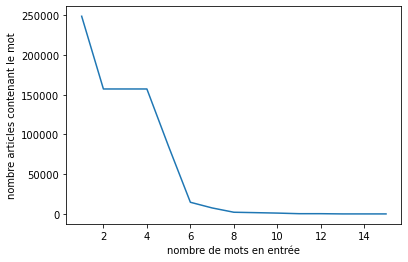

In [147]:
names = list(data.keys())
values_words = list(data["entryWordSize"])
values_articles = list(data["givenPuliedArticleSize"])
values_size_corpus = list(data["givenCorpusSize"])
plt.ylabel('nombre articles contenant le mot')
plt.xlabel('nombre de mots en entrée')
#plt.bar(range(len(data)), values, tick_label=names)
plt.plot(values_words,values_articles)
plt.show()

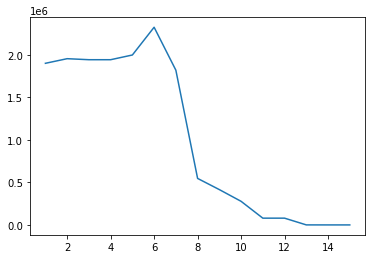

In [148]:

plt.plot(values_words,values_size_corpus)
plt.show()